In [296]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import classification_report,accuracy_score,f1_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector
import numpy as np
from imblearn.over_sampling import SMOTE

# Read The Dataset

In [297]:
#Read the CSV File
data_frame=pd.read_csv('..\data\ACME-HappinessSurvey2020.csv', encoding = 'unicode_escape', sep=',', header=0)
data_frame.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


# Exploratory Data Analysis

In [165]:
# This operation informs the number of rows and columns
data_frame.shape

(126, 7)

In [166]:
# Look for null data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


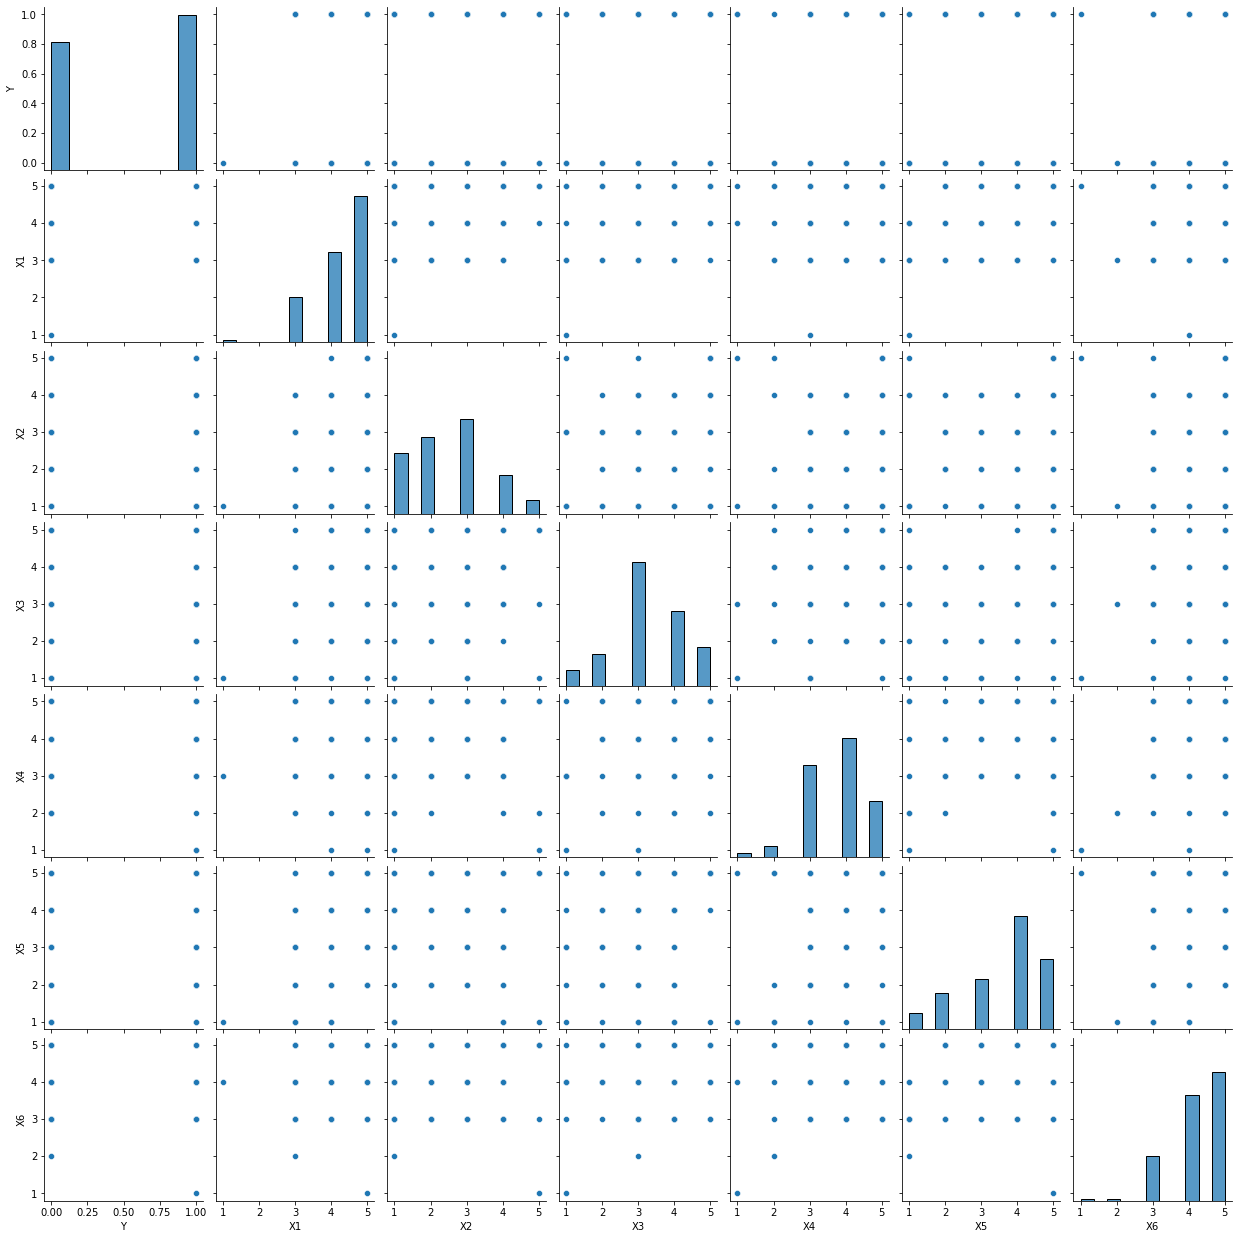

In [167]:
# Visulize the relation between two columns
sb.pairplot(data_frame, palette='husl')
plt.show()

## Check in detail the relationship of each feature with label

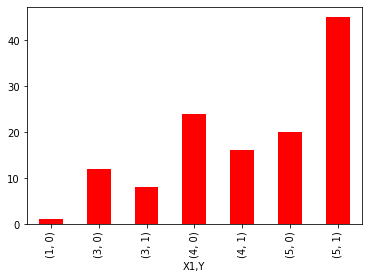

In [168]:
# Check the effect of x1[my order was delivered on time] on y 
data_frame.groupby(['X1','Y']).size().plot.bar(color=('r'))
plt.show()

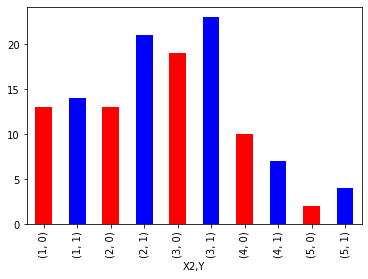

In [169]:
# Check the effect of x2 [contents of my order was as I expected] on y 
data_frame.groupby(['X2','Y']).size().plot.bar(color=('r','b'))
plt.show()

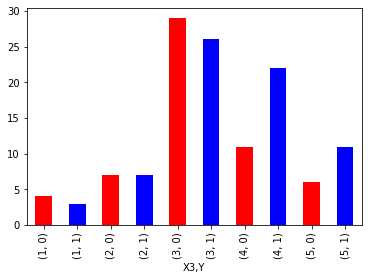

In [170]:
# Check the effect of x3 [I ordered everything I wanted to order] on y 
data_frame.groupby(['X3','Y']).size().plot.bar(color=('r','b'))
plt.show()

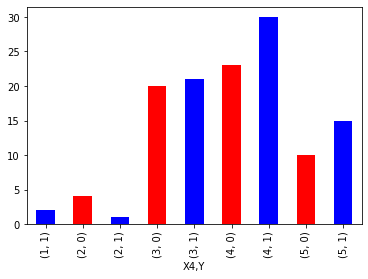

In [171]:
# Check the effect of x4 [I paid a good price for my order] on y 
data_frame.groupby(['X4','Y']).size().plot.bar(color=('b','r'))
plt.show()

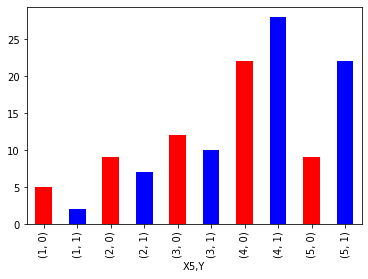

In [172]:
# Check the effect of x5 [I am satisfied with my courier] on y 
data_frame.groupby(['X5','Y']).size().plot.bar(color=('r','b'))
plt.show()

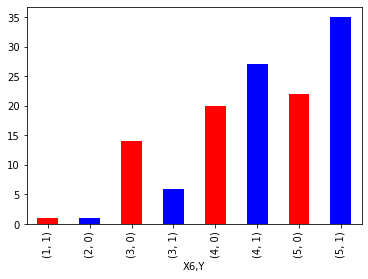

In [173]:
# Check the effect of x6 [the app makes ordering easy for me] on y 
data_frame.groupby(['X6','Y']).size().plot.bar(color=('r','b'))
plt.show()

## Check and Treat the Data Imbalance

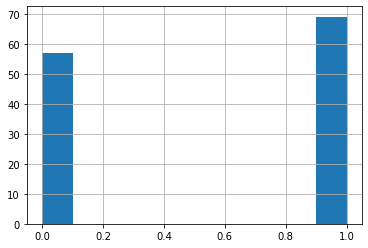

1    69
0    57
Name: Y, dtype: int64


In [174]:
# check the data is balanced or imbalanced
data_frame['Y'].hist()
plt.show()
print(data_frame['Y'].value_counts())

In [299]:
# Function to split features and label

def split_data(data_file):
    y=data_file['Y']
    features=data_file.drop(['Y'],axis=1)
    return(y,features)

In [176]:
# Treat the imbalance data

y,training_set=split_data(data_frame)
oversample = SMOTE()
training_set,y =oversample.fit_resample(training_set,y)
oversampled_dataframe=pd.concat([pd.DataFrame(y),pd.DataFrame(training_set)],axis=1)
print(oversampled_dataframe['Y'].value_counts())

0    69
1    69
Name: Y, dtype: int64


# Feature Selection

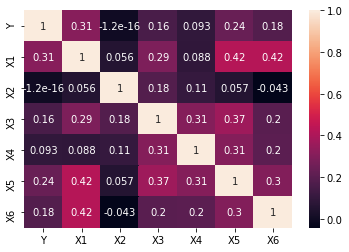

In [177]:
# Find the correlation between y and X
sb.heatmap(oversampled_dataframe.corr(),annot=True)
plt.show()

In [178]:
# Find Exhaustive feature selection 

y,training_set=split_data(data_frame)
efs = ExhaustiveFeatureSelector(RandomForestClassifier(),
                              min_features = 1,max_features = 3,scoring = 'roc_auc',cv = 2)
efs = efs.fit(training_set,y)

selected_features = training_set.columns[list(efs.best_idx_)]
print(selected_features)

print(efs.best_score_)

Features: 41/41

Index(['X1', 'X3'], dtype='object')
0.6850607484373059


In [268]:
# Select the features for building models

data_for_training=oversampled_dataframe.drop(['X2','X4'], axis=1)
data_for_training.head()

,Y,X1,X3,X5,X6
0,0,3,3,2,4
1,0,3,3,4,3
2,1,5,3,3,5
3,0,5,3,3,5
4,0,5,3,3,5


In [269]:
# Data partitioning for building model and later validation

y, training_set = split_data(data_for_training)
X_train, X_test, y_train, y_test=train_test_split(training_set, y, test_size=0.30)

# Classification Models

In [270]:
# Apply SVM

classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


#Calculate accuracy and F1 score

result_svm = accuracy_score(y_test,y_pred)
f1_svm = f1_score(y_test,y_pred)

In [271]:
#Apply Logistic Regression

classifier=LogisticRegression()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


#Calculate accuracy and F1 score

result_logistic_reg = accuracy_score(y_test,y_pred)
f1_logistic_reg = f1_score(y_test,y_pred)

In [293]:
#Apply Random Forest Classifier

classifier=RandomForestClassifier(n_estimators =100)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


#Calculate accuracy and F1 score

result_ran_forest = accuracy_score(y_test,y_pred)
f1_ran_forest= f1_score(y_test,y_pred)

In [287]:
# Apply Xgboost Classifier

classifier = xgb.XGBClassifier(n_estimators = 60, learning_rate = 0.04)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


#Calculate accuracy and F1 score

result_xgb = accuracy_score(y_test,y_pred)
f1_xgb= f1_score(y_test,y_pred)

# Result

In [294]:
# Compare Accuracy

print("Accuracy of SVM:",result_svm)
print("Accuracy of Logistic Regression:",result_logistic_reg)
print("Accuracy of Random Forest:",result_ran_forest)
print("Accuracy of XGBoost:",result_xgb)

Accuracy of SVM: 0.7380952380952381
Accuracy of Logistic Regression: 0.7380952380952381
Accuracy of Random Forest: 0.7142857142857143
Accuracy of XGBoost: 0.7619047619047619


In [295]:
# Compare the F1 score

print("F1 score of SVM:",f1_svm)
print("F1 score of Logistic Regression:",f1_logistic_reg)
print("F1 score of Random Forest:",f1_ran_forest)
print("F1 score of XGBoost:",f1_xgb)

F1 score of SVM: 0.7317073170731706
F1 score of Logistic Regression: 0.7317073170731706
F1 score of Random Forest: 0.7
F1 score of XGBoost: 0.761904761904762


# Conclusion

As per company's need and the data received from them, we build models to find the happy and unhappy customer. Of all 4 models XGBoost showed the best performance with 0.7619.